In [2]:
pip install pyemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mdtraj-1.9.9-cp310-cp310-linux_x86_64.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00
  Using cached deeptime-0.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00
  Created wheel for pyemma: filename=pyEMMA-2.5.12-cp310-cp310-linux_x86_64.whl size=2705180 sha256=af3151afb0dd9e3027f1f61fc7bcfbc93554dcf20e601c6e91ccd03df2aa19bc
  Stored in directory: /root/.cache/pip/wheels/26/e7/52/8fcd9a27e834967fc71dedff33de9038999783184ec26af7a6
Successfully built pyemma


In [3]:
pip install mdshare

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.0 MB/s eta 0:00:00
  Created wheel for mdshare: filename=mdshare-0.4.2-py3-none-any.whl size=20621 sha256=cbd5cf57d2179885e3ccea302b0f15f83a94f9ed37041113ef3319f691726358
  Stored in directory: /root/.cache/pip/wheels/c5/f4/43/70d3bd71fa229cd9f55ab315df017a6740c1ea87207f6b75bc
Successfully built mdshare


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdshare
import pyemma
from pyemma.util.contexts import settings

In [8]:
import mdtraj
file = mdtraj.load('trajectory_100000.dcd', top='trajectory.pdb')
startpdb=file.slice(0)
startpdb.save_pdb('start.pdb')
topfile='start.pdb'
distances_feat = pyemma.coordinates.featurizer(topfile)
distances_feat.add_distances(
    distances_feat.pairs(distances_feat.select("symbol == C")))
distances_data = pyemma.coordinates.load('trajectory_100000.dcd', features=distances_feat)

In [12]:
tica = pyemma.coordinates.tica(distances_data, lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

<ipython-input-12-3a8b9307e1bf>:1: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-12-3a8b9307e1bf> line 1. Use deeptime.decomposition.TICA instead.
  tica = pyemma.coordinates.tica(distances_data, lag=5)


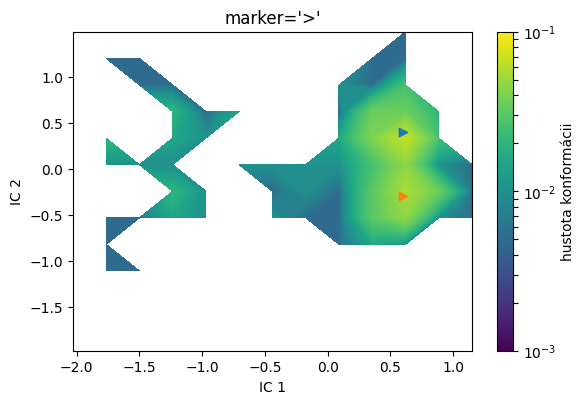

In [35]:
fig, axes = plt.subplots(1, figsize=(6, 4))

pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes, logscale=True, nbins=13, cbar_label = 'hustota konformácii')
axes.set_xlabel('IC 1')
axes.set_ylabel('IC 2')
fig.tight_layout()
axes.scatter(0.6, 0.4, marker=">")
axes.set_title("marker='>'")
axes.scatter(0.6, -0.3, marker=">")
axes.set_title("marker='>'")
plt.savefig('hustota_konformacii.png')

In [40]:
id1_target=0.6
id2_target=0.4
dist = np.linalg.norm(tica_concatenated[:, :2]-[id1_target,id2_target], axis=1)
trajidx=np.argmin(dist)
file = mdtraj.load('trajectory_100000.dcd', top=topfile)
tmp=mdtraj.load(topfile)
tmp.xyz[0,:,:]=file.xyz[trajidx,:,:]
tmp.save_pdb('localmin1.pdb')

In [39]:
id1_target=0.6
id2_target=-0.3
dist = np.linalg.norm(tica_concatenated[:, :2]-[id1_target,id2_target], axis=1)
trajidx=np.argmin(dist)
file = mdtraj.load('trajectory_100000.dcd', top=topfile)
tmp=mdtraj.load(topfile)
tmp.xyz[0,:,:]=file.xyz[trajidx,:,:]
tmp.save_pdb('localmin2.pdb')